---

#University of Stirling - Spring 2023

## ITNPAI1 - Deep Learning for Vision and NLP (2022/3)

---

---
# 1. **Problem definition** 

There is a need to create reliable and effective techniques to automatically categorise photos given the increasing volume of digital imagery. The richness and unpredictability of image information, as well as the necessity for robustness to image variables like lighting, stance, and occlusion, make image classification a tough task. A crucial area of research, picture categorization is also a critical task in many industries, including robotics, security, and healthcare. Thus, it is necessary to create sophisticated computer vision methods that can identify images reliably and effectively in a variety of fields.

One of the most important jobs in computer vision is the assignment of a label or a category to an input image based on the visual content of the image. The following are some examples of how crucial Image classification is to computer vision:

Identifying objects in an image and classifying them into distinct classes or categories can aid in object detection. This is helpful in applications like self-driving automobiles where it is necessary to identify and track items like pedestrians, traffic signs, and other vehicles.

By classifying photographs according to their content, it is possible to find related pictures in a sizable database. This is helpful in systems like content-based picture retrieval systems and image search engines.

In order to complete the objective, a dataset of labelled photos from Accra, Ghana, and Pune, India, will be used as training data to create a computer vision model that can reliably categorise images containing forests from images containing streets. The next step is to assess the algorithm's performance using photos from Stirling, Scotland—that wasn't a part of the training set. The classification task entails classifying forests from streets ensuring that the system can correctly categorise the same across various cities and environmental situations, such as shifting lighting, weather, and background, will be a problem.


[top](#scrollTo=4i5afvUbhmGo)
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# 2. **GitHub repository**

Github repository for the same has been created

---
# 3. **Dataset creation**

Dataset has been created

<h1>Implementation of Image Classification Using YOLO version 5</h1>
<p>We tried implementing whether the given image contains streets and forests by using yolo. YOLO, that is You Only Look Once, is generalized model which is widely trained over millions of images and used for applications like Object detection, Image Classification and Semantic Segmentation. We tried training yolo as the image classifier and It turned out that model is giving the promising results. In the Below code snippet we just cloned Yolo Github's repository</p>

In [ ]:
#cloning the yolo v5 github reporsitory
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

#installation of required components
%pip install -qr requirements.txt 

import torch
import utils

#device checks
display = utils.notebook_init()  

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [ ]:
#this is the additional cloning that has been done to classify trash, but in our application,
#we are not using any directory hence the snippet is redundant
!git clone https://github.com/DarvinX/trash_classifier.git

Cloning into 'trash_classifier'...
remote: Enumerating objects: 2574, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2574 (delta 0), reused 0 (delta 0), pack-reused 2571
Receiving objects: 100% (2574/2574), 43.30 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.87M/4.87M [00:00<00:00, 101MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 88.0MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 78.8MB/s]

100%|██████████| 50.9M/50.9M [00:00<00:00, 78.0MB/s]

100%|██████████| 92.0M/92.0M [00:01<00:00, 71.3MB/s]



---

# 6. **Experimental tests and evaluations** 


In tests and Evaluations, we training and testing the yolo model simultaneously and interpretting the results and graphs and evaluations are as shown 

In [ ]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

User Authentication for google drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

  - *E1* - Training the models.
  - *E2* - Testing the models in the dataset. 
  - *E3* - Testing the models crossing datasets. 

Solution : In the below code as the part of training, we are providing 100 Images of the city of ghana and 100 Images of Pune, so in total, we are providing 200 Images as a part of training. As a part of testing we are including 200 more images from stirling city centre. In yolo, for Image classification, we have already divided this into training data and testing data in the form of folders on the google drive. Here, in yolo all we did is pass the path of the folder and here are the below results.

In [ ]:
%cd ../yolov5
#importing weights and models of YOLO on github
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

#downloading the weights for th yolo classifier model
for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

#training and testing yolo v5
!python classify/train.py --model yolov5n-cls.pt --data /content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset --epochs 30 --img 224 --pretrained weights/yolov5s-cls.pt

/content/yolov5
classify/train: model=yolov5n-cls.pt, data=/content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset, epochs=30, batch_size=64, imgsz=224, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTen

In [ ]:
#prediction of Yolo Model on unseen image
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/forests-beech.jpg

classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/forests-beech.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 117 layers, 1211026 parameters, 0 gradients, 2.9 GFLOPs
image 1/1 /content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/forests-beech.jpg: 224x224 Forests 0.93, Streets 0.07, 18.9ms
Speed: 0.1ms pre-process, 18.9ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


<h1>Graphical representation of testing accuracy</h1>
<p>In the below couple of code snippets, we have a graphical representation of models performance, for this we are using pandas and matplotlib

In [ ]:
#importing Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt


<h3>Reading csv files to form pandas dataframes</h3>
<p>After training the YOLO, the system generates the csv files by using pandas data frame, we are reading the csv file.Then we ploting the outcomes are plotted using matplotlib</p>

In [ ]:
#creating the pandas dataframes from csv file that has been obtained after training and testing the YOLO model
df=pd.read_csv("/content/yolov5/runs/train-cls/exp/results.csv")
print(df.columns)

Index(['                  epoch', '             train/loss',
       '              test/loss', '  metrics/accuracy_top1',
       '  metrics/accuracy_top5', '                   lr/0'],
      dtype='object')


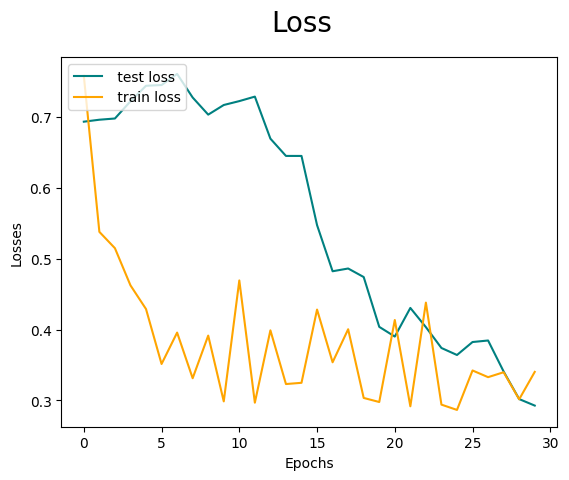

In [ ]:
#plotting the graphs of train loss versus test loss
plt.plot(df['                  epoch'],df['              test/loss'],color='teal',label=' test loss')
plt.plot(df['                  epoch'],df['             train/loss'],color='orange',label=' train loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

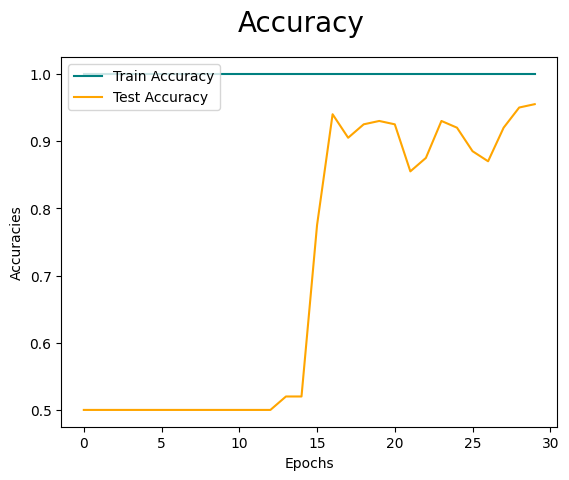

In [ ]:
#Plotting the graphs for train and test accuracy
plt.plot(df['                  epoch'],df['  metrics/accuracy_top5'],color='teal',label='Train Accuracy')
plt.plot(df['                  epoch'],df['  metrics/accuracy_top1'],color='orange',label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h3>Plotting the Testing Outcomes</h3>
<p>We have shown the below image as the outcome in the form of Predicted-Actual. In the Below image, there is only one image that is predicted as street and expected outcome was forests After training and testing the YOLO, it saves some images: one for train which is described in report and one for test which has been shown below, we are showing only one Image that is test image below.</p>

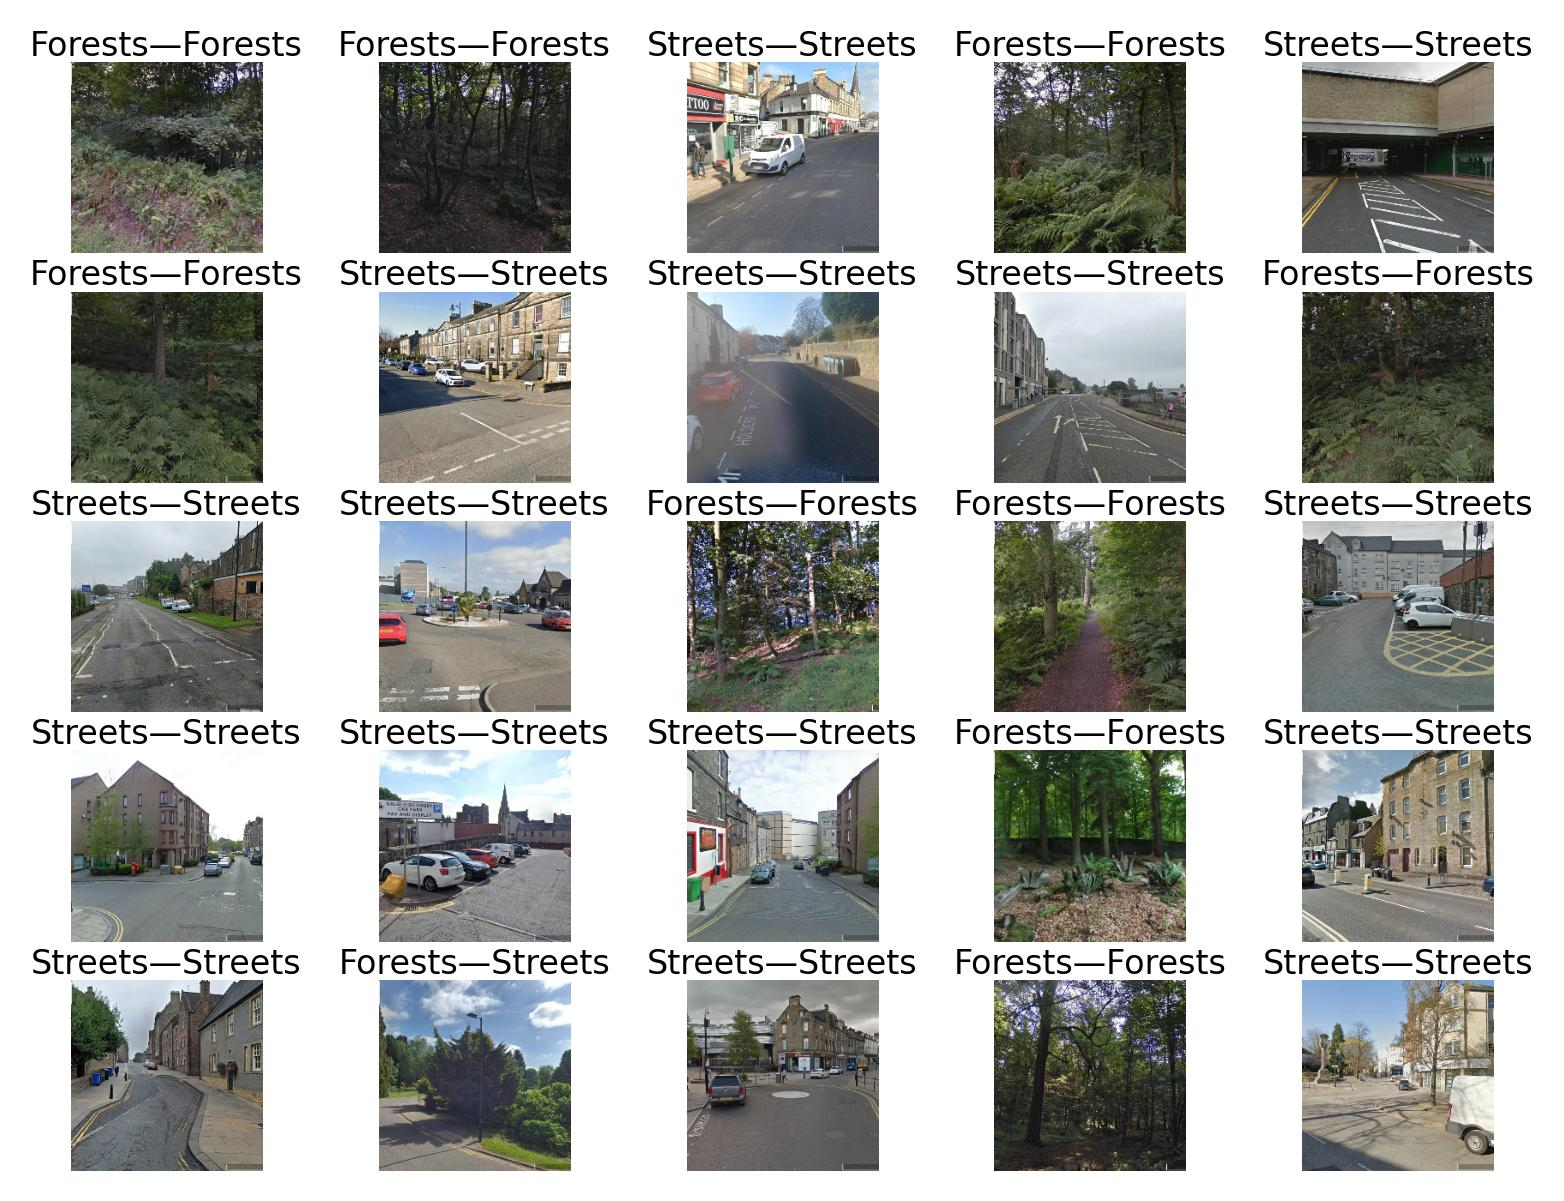

In [ ]:
#Displaying the test outcome of the image
display.Image('/content/yolov5/runs/train-cls/exp/test_images.jpg',width=1000,height=1000)

<h3>Results of Predictions of the Unseen Image</h3>
<p>After running the predict commmand by passing the unseen image, YOLO outputs the image with labels of prediction. In the below image, YOlO has predicted 93% of the probability that Image is of the forest</p>

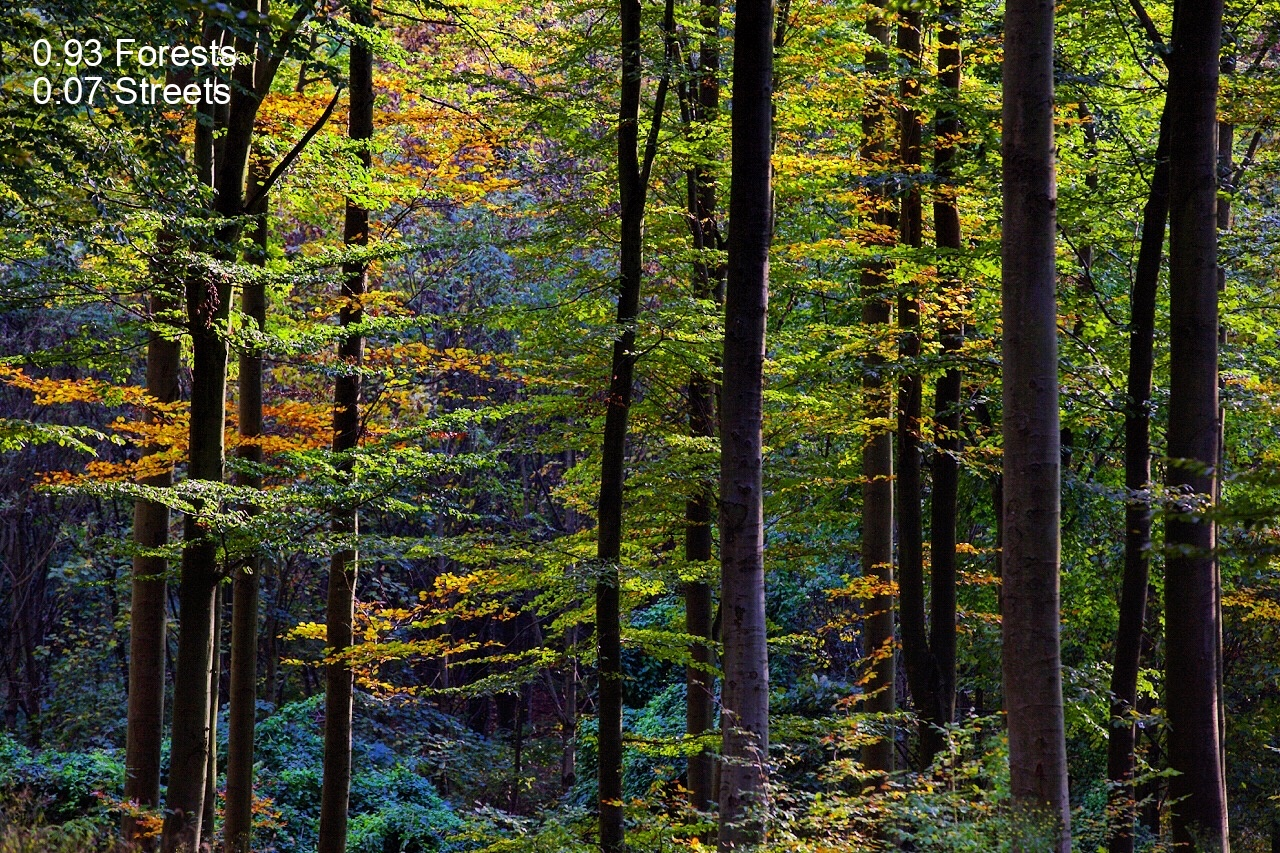

In [ ]:
display.Image('/content/yolov5/runs/predict-cls/exp/forests-beech.jpg')